In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import model_selection
from sklearn import metrics
from sklearn import linear_model
from sklearn import ensemble
from sklearn import tree
from sklearn import svm
import xgboost

In [ ]:
import csv

In [ ]:
data=pd.read_csv('/weatherAUS.csv')

In [ ]:
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [ ]:
data.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,64055.00000,64224.000000,63218.000000,27549.000000,20742.000000,58617.000000,63305.000000,62688.000000,63393.000000,62936.000000,54586.000000,54638.000000,37314.000000,36536.000000,63729.000000,63214.000000
mean,11.41761,22.351221,2.513765,5.341537,7.479973,39.748639,13.333576,18.201665,71.473491,52.994947,1018.263293,1015.817036,4.593879,4.657434,16.050045,20.909446
std,6.39995,6.888471,8.736607,4.336671,3.797685,14.201945,9.187230,9.363430,17.746277,20.734705,7.004978,6.891697,2.927233,2.721478,6.121205,6.708333
min,-8.50000,-4.800000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,3.000000,1.000000,980.500000,979.000000,0.000000,0.000000,-7.200000,-5.400000
25%,6.80000,17.800000,0.000000,2.600000,4.700000,30.000000,7.000000,11.000000,60.000000,38.000000,1013.600000,1011.200000,1.000000,2.000000,11.800000,16.600000
50%,11.70000,22.100000,0.000000,4.400000,8.400000,37.000000,13.000000,17.000000,72.000000,53.000000,1018.300000,1015.900000,5.000000,5.000000,16.500000,20.600000
75%,16.50000,26.700000,0.600000,7.000000,10.400000,48.000000,19.000000,24.000000,85.000000,67.000000,1023.000000,1020.500000,7.000000,7.000000,20.600000,25.100000
max,30.50000,47.300000,371.000000,145.000000,14.100000,135.000000,130.000000,83.000000,100.000000,100.000000,1040.600000,1037.900000,9.000000,8.000000,37.700000,46.700000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64675 entries, 0 to 64674
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           64675 non-null  object 
 1   Location       64675 non-null  object 
 2   MinTemp        64055 non-null  float64
 3   MaxTemp        64224 non-null  float64
 4   Rainfall       63218 non-null  float64
 5   Evaporation    27549 non-null  float64
 6   Sunshine       20742 non-null  float64
 7   WindGustDir    58609 non-null  object 
 8   WindGustSpeed  58617 non-null  float64
 9   WindDir9am     58006 non-null  object 
 10  WindDir3pm     61914 non-null  object 
 11  WindSpeed9am   63305 non-null  float64
 12  WindSpeed3pm   62688 non-null  float64
 13  Humidity9am    63393 non-null  float64
 14  Humidity3pm    62936 non-null  float64
 15  Pressure9am    54586 non-null  float64
 16  Pressure3pm    54638 non-null  float64
 17  Cloud9am       37314 non-null  float64
 18  Cloud3

In [ ]:
data.shape

(64675, 23)

In [ ]:
data.isnull().sum()

Date                 0
Location             0
MinTemp            620
MaxTemp            451
Rainfall          1457
Evaporation      37126
Sunshine         43933
WindGustDir       6066
WindGustSpeed     6058
WindDir9am        6669
WindDir3pm        2761
WindSpeed9am      1370
WindSpeed3pm      1987
Humidity9am       1282
Humidity3pm       1739
Pressure9am      10089
Pressure3pm      10037
Cloud9am         27361
Cloud3pm         28139
Temp9am            946
Temp3pm           1461
RainToday         1457
RainTomorrow      1456
dtype: int64

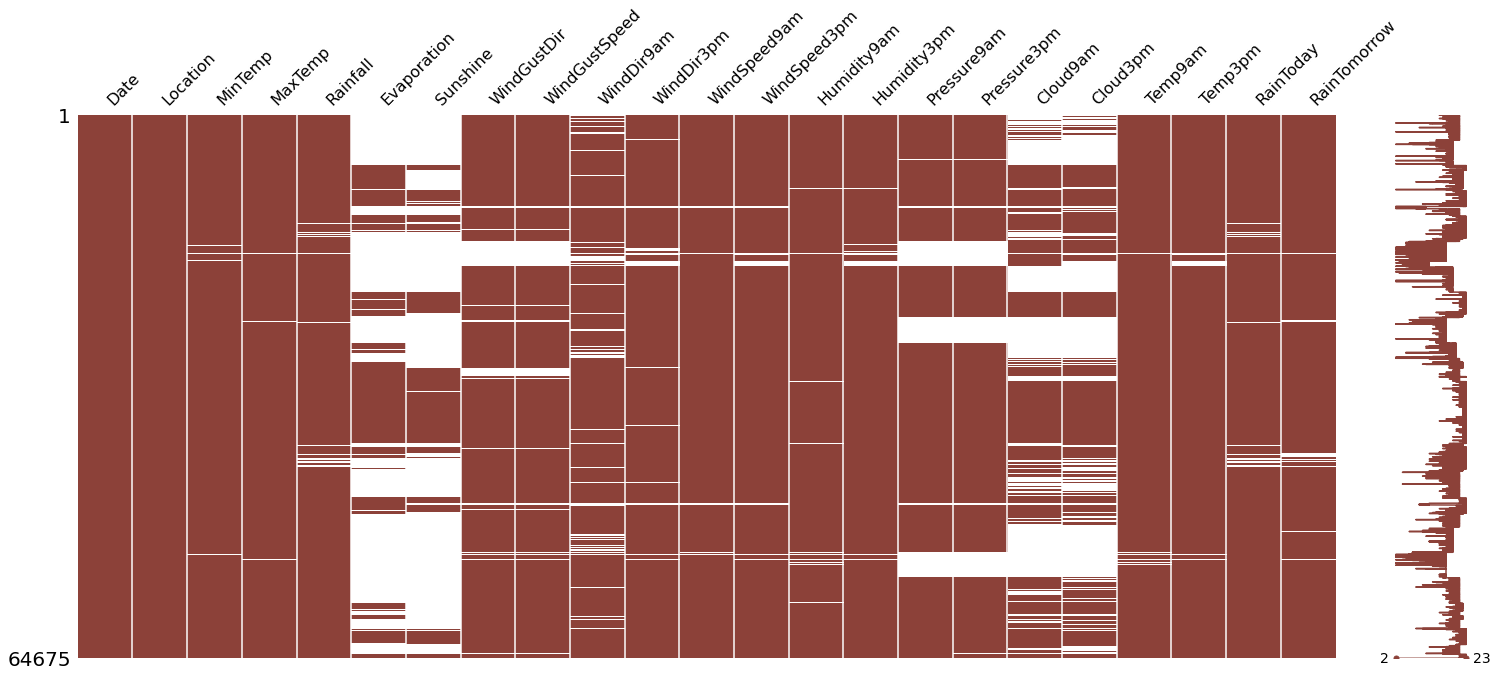

In [ ]:
import missingno as msno 
msno.matrix(data, color= (0.55, 0.255, 0.225), fontsize=16)

In [ ]:
data_cat = data[['RainToday', 'WindGustDir', 'WindDir9am', 'WindDir3pm']] 
data.drop(columns=['Evaporation', 'Sunshine', 'Cloud9am', 'Cloud3pm'],axis=1,inplace=True) 
data.drop(columns=['RainToday', 'WindGustDir', 'windDir9am', 'Wind Dir3pm'],axis=1,inplace=True)

In [ ]:
data['MinTemp'].fillna (data['MinTemp'].mean(), inplace=True)
data['MaxTemp'].fillna(data['MaxTemp'].mean(), inplace=True)
data['Rainfall'].fillna (data['Rainfall'].mean(), inplace=True)
data['WindGustSpeed'].fillna (data['WindGustSpeed'].mean(), inplace=True) 
data['WindSpeed9am'].fillna (data['wind Speed9am'].mean(), inplace=True)
data['WindSpeed3pm ].fillna (data['WindSpeed3pm'].mean(), inplace=True)
data['Humidity 9am'].fillna (data['Humidity9am'].mean(), inplace=True) 
data['Humidity3pm'].fillna (data['Humidity3pm'].mean(), inplace=True)
data['Pressure9am ].fillna (data['Pressure9am'].mean(), inplace=True) 
data['Pressure3pm ].fillna (data[ 'Pressure3pm'].mean(), inplace=True)
data['Temp9am'].fillna(data['Temp9am ]. mean(), inplace=True)
data['Temp3pm ].fillna(data['Temp3pm'].mean(), inplace=True)

In [ ]:
cat_names data_cat.columns

In [ ]:
import numpy as np
from sklearn.impute 
import SimpleImputer imp_mode= SimpleImputer (missing_values-np.nan, strategy='most_frequent')

In [ ]:
data_cat imp_mode.fit_transform(data_cat)

In [ ]:
data_cat= pd.DataFrame(data_cat, columns=cat_names)

In [ ]:
data = pd.concat([data, data_cat], axis=1)

In [ ]:
data.corr()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
MinTemp,1.000000,0.718218,0.102033,0.422703,-0.034383,0.215406,0.167838,0.169917,-0.195025,0.043966,-0.403323,-0.382026,0.109067,0.063129,0.909620,0.689380
MaxTemp,0.718218,1.000000,-0.084394,0.536709,0.395793,0.070246,-0.081326,0.026414,-0.409379,-0.497096,-0.320115,-0.392670,-0.257494,-0.232616,0.868113,0.983755
Rainfall,0.102033,-0.084394,1.000000,-0.035548,-0.240745,0.145839,0.124729,0.067661,0.224065,0.257260,-0.127805,-0.085475,0.200245,0.160956,0.009547,-0.087097
Evaporation,0.422703,0.536709,-0.035548,1.000000,0.275497,0.222776,0.161402,0.104879,-0.421744,-0.306500,-0.249577,-0.256180,-0.121936,-0.089709,0.501811,0.520555
Sunshine,-0.034383,0.395793,-0.240745,0.275497,1.000000,-0.051851,-0.043514,0.028852,-0.502378,-0.635385,0.021557,-0.026619,-0.715434,-0.707979,0.187800,0.425973
WindGustSpeed,0.215406,0.070246,0.145839,0.222776,-0.051851,1.000000,0.569621,0.696882,-0.223850,0.005915,-0.478639,-0.433098,0.052255,0.089041,0.194642,0.034583
WindSpeed9am,0.167838,-0.081326,0.124729,0.161402,-0.043514,0.569621,1.000000,0.504437,-0.240858,0.066743,-0.210610,-0.131816,0.021691,0.067289,0.096378,-0.091707
WindSpeed3pm,0.169917,0.026414,0.067661,0.104879,0.028852,0.696882,0.504437,1.000000,-0.166183,0.022560,-0.308959,-0.258819,0.037818,0.014432,0.161961,0.001669
Humidity9am,-0.195025,-0.409379,0.224065,-0.421744,-0.502378,-0.223850,-0.240858,-0.166183,1.000000,0.616096,0.172972,0.189595,0.487716,0.348845,-0.413625,-0.401211
Humidity3pm,0.043966,-0.497096,0.257260,-0.306500,-0.635385,0.005915,0.066743,0.022560,0.616096,1.000000,0.042017,0.109636,0.517730,0.520306,-0.183193,-0.545425


In [ ]:
cor=data.corr()

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


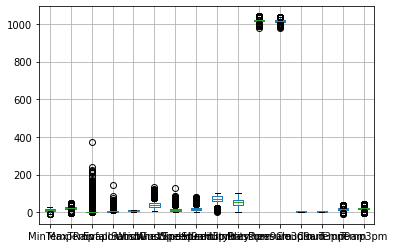

In [ ]:
data.boxplot()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


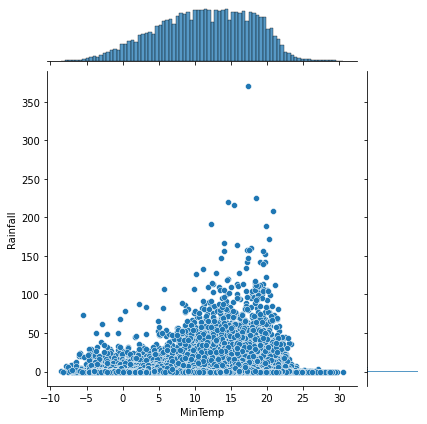

In [ ]:
sns.jointplot(data["MinTemp"], data['Rainfall'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


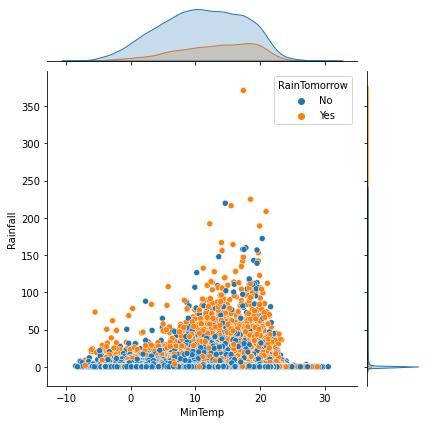

In [ ]:
sns.jointplot(data["MaxTemp"], data['Rainfall'],hue=data["RainTomorrow"])

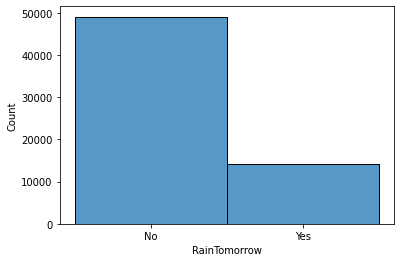

In [ ]:
sns.histplot(data['RainTomorrow'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


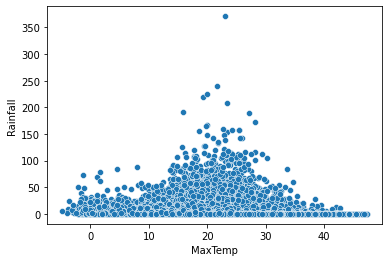

In [ ]:
sns.scatterplot(data["MaxTemp"], data['Rainfall'])

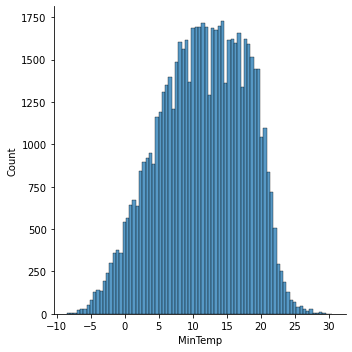

In [ ]:
sns.displot(data["MinTemp"])

In [ ]:
y=data["RainTomorrow"]
x=data.drop("RainTomorrow",axis=1)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
y= data['RainTomorrow']
X = data.drop('RainTomorrow', axis=1)

In [ ]:
names = x.columns # Loading the names of the x_features

In [ ]:
names

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday'],
      dtype='object')

In [ ]:
SC = StandardScaler() # initializing the standardscaler

In [ ]:
X = pd.DataFrame(x, columns=names) #scaled data turns into array format, converting them into dataframe

In [ ]:
pd.DataFrame(x, columns=names) #scaled data turns into array format, converting them into dataframe

In [ ]:
from sklearn import model_selection

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 8.2, random_state =0)